In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('dengue_features_train.csv')
label = pd.read_csv('dengue_labels_train.csv')
test = pd.read_csv('dengue_features_test.csv')

In [3]:
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
label.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [5]:
test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [6]:
print(train.shape)
print(label.shape)
print(test.shape)

(1456, 24)
(1456, 4)
(416, 24)


In [7]:
data = train.join(label['total_cases'])
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [8]:
data.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [9]:
pd.options.display.max_columns = 25

In [10]:
data.dropna(inplace= True)
test = test.fillna(0)

In [11]:
data.isna().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1199 non-null   object 
 1   year                                   1199 non-null   int64  
 2   weekofyear                             1199 non-null   int64  
 3   week_start_date                        1199 non-null   object 
 4   ndvi_ne                                1199 non-null   float64
 5   ndvi_nw                                1199 non-null   float64
 6   ndvi_se                                1199 non-null   float64
 7   ndvi_sw                                1199 non-null   float64
 8   precipitation_amt_mm                   1199 non-null   float64
 9   reanalysis_air_temp_k                  1199 non-null   float64
 10  reanalysis_avg_temp_k                  1199 non-null   float64
 11  rean

In [13]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,1199.0,2001.303586,5.345922,1990.000000,1998.000000,2002.000000,2006.000000,2010.000000
weekofyear,1199.0,26.497081,14.895735,1.000000,14.000000,26.000000,39.000000,52.000000
ndvi_ne,1199.0,0.139716,0.140115,-0.406250,0.042425,0.124300,0.246879,0.508357
ndvi_nw,1199.0,0.134362,0.120743,-0.456100,0.051587,0.126800,0.220714,0.454429
ndvi_se,1199.0,0.205564,0.074457,-0.015533,0.155607,0.196729,0.252550,0.538314
ndvi_sw,1199.0,0.205708,0.085548,-0.063457,0.144950,0.192300,0.254400,0.546017
precipitation_amt_mm,1199.0,47.578932,43.179096,0.000000,12.550000,41.410000,71.765000,390.600000
reanalysis_air_temp_k,1199.0,298.675363,1.364722,294.635714,297.637143,298.618571,299.792143,302.200000
reanalysis_avg_temp_k,1199.0,299.243495,1.261411,294.892857,298.289286,299.321429,300.221429,302.614286
reanalysis_dew_point_temp_k,1199.0,295.303517,1.500510,289.642857,294.216429,295.682857,296.502143,298.450000


In [14]:
data['week_start_date'] = pd.to_datetime(data['week_start_date'])
test['week_start_date'] = pd.to_datetime(test['week_start_date'])

In [15]:
data.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

In [16]:
data['month'] = data['week_start_date'].dt.month
data['date'] = data['week_start_date'].dt.day
test['month'] = test['week_start_date'].dt.month
test['date'] = test['week_start_date'].dt.day

In [17]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,month,date
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,4,30
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,5,7
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,5,14
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,5,21
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,5,28


In [18]:
data.drop('week_start_date', axis=1, inplace= True)
test.drop('week_start_date', axis=1, inplace= True)

In [19]:
data.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,month,date
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,4,30
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,5,7
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,5,14
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,5,21
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,5,28


In [20]:
data['city'].unique()

array(['sj', 'iq'], dtype=object)

In [21]:
data['city'] = data['city'].map({'sj':0, 'iq':1})
test['city'] = test['city'].map({'sj':0, 'iq':1})

<AxesSubplot:>

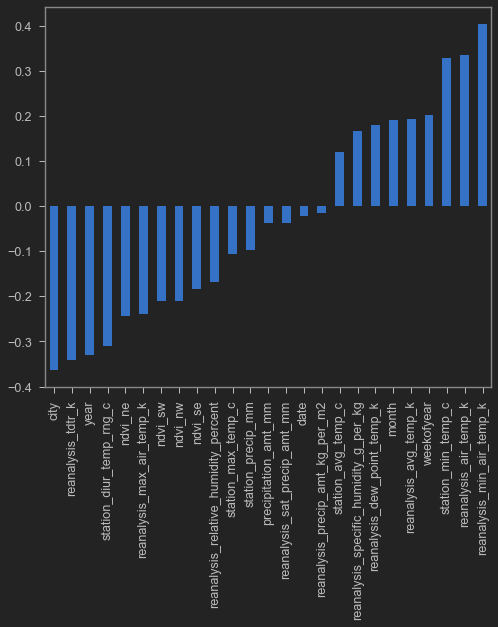

In [22]:
data.corr()['total_cases'].sort_values().drop('total_cases').plot(kind= 'bar')

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [24]:
x = data.drop('total_cases', axis=1)
y = data['total_cases']

In [25]:
x.shape

(1199, 25)

In [26]:
y.shape

(1199,)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
test = scaler.transform(test)

In [29]:
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('Decision Tree Regressor', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('Random Forest Regressor', RandomForestRegressor()))
models.append(('XGBoost', XGBRegressor()))
models.append(('Support Vector', SVR()))

In [30]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
    print('Mean Squared Error:', mean_squared_error(y_test, predictions))
    print('R2_Squared:', r2_score(y_test, predictions))
    print('\n')

LinearRegression
Mean Absolute Error: 16.19479834524726
Mean Squared Error: 718.2065950038018
R2_Squared: 0.22773886627533824


Decision Tree Regressor
Mean Absolute Error: 14.0875
Mean Squared Error: 873.9375
R2_Squared: 0.0602871524022639


KNN
Mean Absolute Error: 14.970833333333333
Mean Squared Error: 608.8231666666667
R2_Squared: 0.3453548433019473


Random Forest Regressor
Mean Absolute Error: 11.953499999999998
Mean Squared Error: 444.6854575
R2_Squared: 0.5218460844709982


XGBoost
Mean Absolute Error: 10.023047388469179
Mean Squared Error: 281.622710562895
R2_Squared: 0.6971814582950713


Support Vector
Mean Absolute Error: 13.620383099155855
Mean Squared Error: 814.7677069372997
R2_Squared: 0.12391025443269388




In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [32]:
model = Sequential()
model.add(Dense(25, activation= 'relu'))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss= 'mean_absolute_error')

In [33]:
model.fit(x= x_train, y=y_train.values, batch_size= 128, epochs=600, verbose= 0, validation_data=(x_test, y_test.values))

<AxesSubplot:>

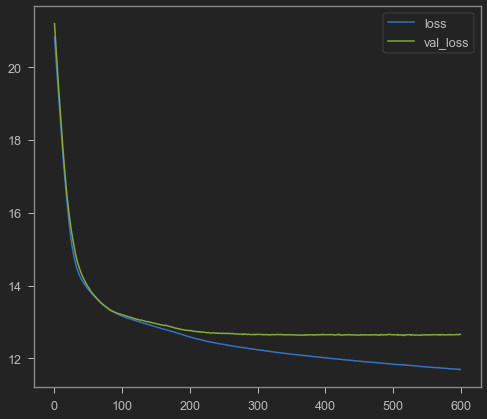

In [34]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [35]:
predictions = model.predict(x_test)

In [36]:
print(mean_absolute_error(y_test, predictions))

12.660554620188972


###### from result above we can see that the xgboost model has smallest mean absolute error (6.9). so we will choose that model to make the predictions

In [37]:
predictions = models[4][1].predict(test)
predictions = predictions.astype('int')

In [38]:
test = pd.read_csv('dengue_features_test.csv')

In [39]:
test = test[['city', 'year', 'weekofyear']]
test['total_cases'] = predictions

In [40]:
test.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,5
1,sj,2008,19,6
2,sj,2008,20,7
3,sj,2008,21,11
4,sj,2008,22,7


In [42]:
test.to_csv('submission.csv', index=False)